In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

plt.rcParams['figure.facecolor'] = 'lightgrey'

def get_financials(ticker:str) -> pd.DataFrame:
    bs = yf.Ticker(ticker).balance_sheet.iloc[:, :-1]
    ist = yf.Ticker(ticker).income_stmt.iloc[:, :-1]
    cf = yf.Ticker(ticker).cash_flow.iloc[:, :-1]
    return bs, ist, cf

# Bajar un precio en una fecha dada
def get_historical_price(ticker: str, start: str):
    end = start+datetime.timedelta(days=4)
    price=pd.DataFrame(yf.Ticker(ticker).history(start=start, end=end)["Close"])
    return price.iloc[0, 0]


def plot_financials(ticker: str):
    # Fetch financial data
    bs, ist, cf = get_financials(ticker)

    # Calculate financial ratios
    gross_margin = ist.loc['Gross Profit'] / ist.loc['Total Revenue']
    operating_margin = ist.loc['Operating Income'] / ist.loc['Total Revenue']
    net_margin = ist.loc['Net Income Common Stockholders'] / ist.loc['Total Revenue']
    roe = ist.loc['Net Income Common Stockholders'] / bs.loc['Total Capitalization']
    revenue = ist.loc['Total Revenue']
    fcf_to_sales = cf.loc['Free Cash Flow'] / ist.loc['Total Revenue']
    current_ratio = bs.loc['Current Assets'] / bs.loc['Current Liabilities']
    solvency = bs.loc['Total Assets'] / bs.loc['Total Liabilities Net Minority Interest']

    df_multiplos = pd.DataFrame({
        'Gross Margin': gross_margin,
        'Operating Margin': operating_margin,
        'Net Margin': net_margin,
        'ROE': roe,
        'Revenue': revenue,
        'FCF to Sales': fcf_to_sales,
        'Current Ratio': current_ratio,
        'Solvency': solvency,
    }).sort_index()

    # Fetch stock price data (last 4 years)
    stock_data = yf.download(ticker, period='4y', progress=False)['Close']
    
    # Create figure with subplots: 3 rows (financials) + 1 row (stock price)
    fig = plt.figure(figsize=(20, 14))
    gs = fig.add_gridspec(3, 1, height_ratios=[1, 1, 1.5])  # 3 rows for financials, 1 row for stock price
    
    # Main title
    fig.suptitle(ticker, fontsize=24, fontweight='bold', y=0.98)
    
    # --- Financial Ratios (3x4 grid) ---
    # Create 3x4 grid for financial metrics
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0])
    
    # Split financial metrics into 3 groups for each row
    metrics = [
        ['Gross Margin', 'Operating Margin', 'Net Margin', 'ROE'],
        ['Revenue', 'FCF to Sales', 'Current Ratio', 'Solvency'],
        ['EPS', 'PER', 'PBV', 'Price']
    ]
    
    # Plot financial metrics
    for row_idx, row_axes in enumerate([ax1, ax2]):
        # Create 4 subplots within this row
        row_axes.remove()  # Remove the original axis
        sub_gs = gs[row_idx, 0].subgridspec(1, 4, wspace=0.3)
        row_axes = [fig.add_subplot(sub_gs[0, i]) for i in range(4)]
        
        for i, metric in enumerate(metrics[row_idx]):
            row_axes[i].plot(df_multiplos.index, df_multiplos[metric], c='navy')
            row_axes[i].set_title(metric, fontsize=14, fontweight='bold')
            x_ticks = np.linspace(0, len(df_multiplos.index)-1, 4, dtype=int)
            row_axes[i].set_xticks(df_multiplos.index[x_ticks])
            row_axes[i].tick_params(axis='x', rotation=45)
            row_axes[i].grid(True, ls='--', alpha=0.4)

    # --- Stock Price Plot (Bottom Row) ---
    ax_stock = fig.add_subplot(gs[2, 0])
    ax_stock.plot(stock_data.index, stock_data, c='navy', linewidth=2, label=f'{ticker} Price')
    ax_stock.set_title(f'{ticker} Stock Price (Last 4 Years)', fontsize=14, fontweight='bold')
    ax_stock.grid(True, ls='--', alpha=0.4)
    ax_stock.legend()
    
    plt.tight_layout()
    plt.show()

## <font color = "royalblue"> Duke Energy Corporation (DUK)

### <font color = "dodgerblue"> Descripción de la empresa 

Duke Energy Corporation, fundada en 1994, es una de las empresas de energía mas grandes de Estados Unidos, posicionándose dentro de las 150 empresas mas importantes de EE.UU. Tienen sede en la ciudad Charlotte, Carolina del Norte, sin embargo, tambien operan en los estados de Carolina del Sur, Florida, Indiana, Ohio y Kentucky. 

Principalmente operan como suministradores de electricidad y gas natural alrededor de varios estados de EEUU y cuentan con alrededor de 26,000 empleados. Sus servicios de energía han servido a más de 8.4 millones de clientes y los de gás natural a 1.7 millones. Actualmente, operan en proyectos de energía eólica, solar y almacenamiento de energía. Además, tienen inversiones en energía nuclear y plantas de gas natural con tecnologías de hidrógeno con el motivo de apoyar a la descarbonización.

### <font color = "dodgerblue"> Fundamentales

YF.download() has changed argument auto_adjust default to True


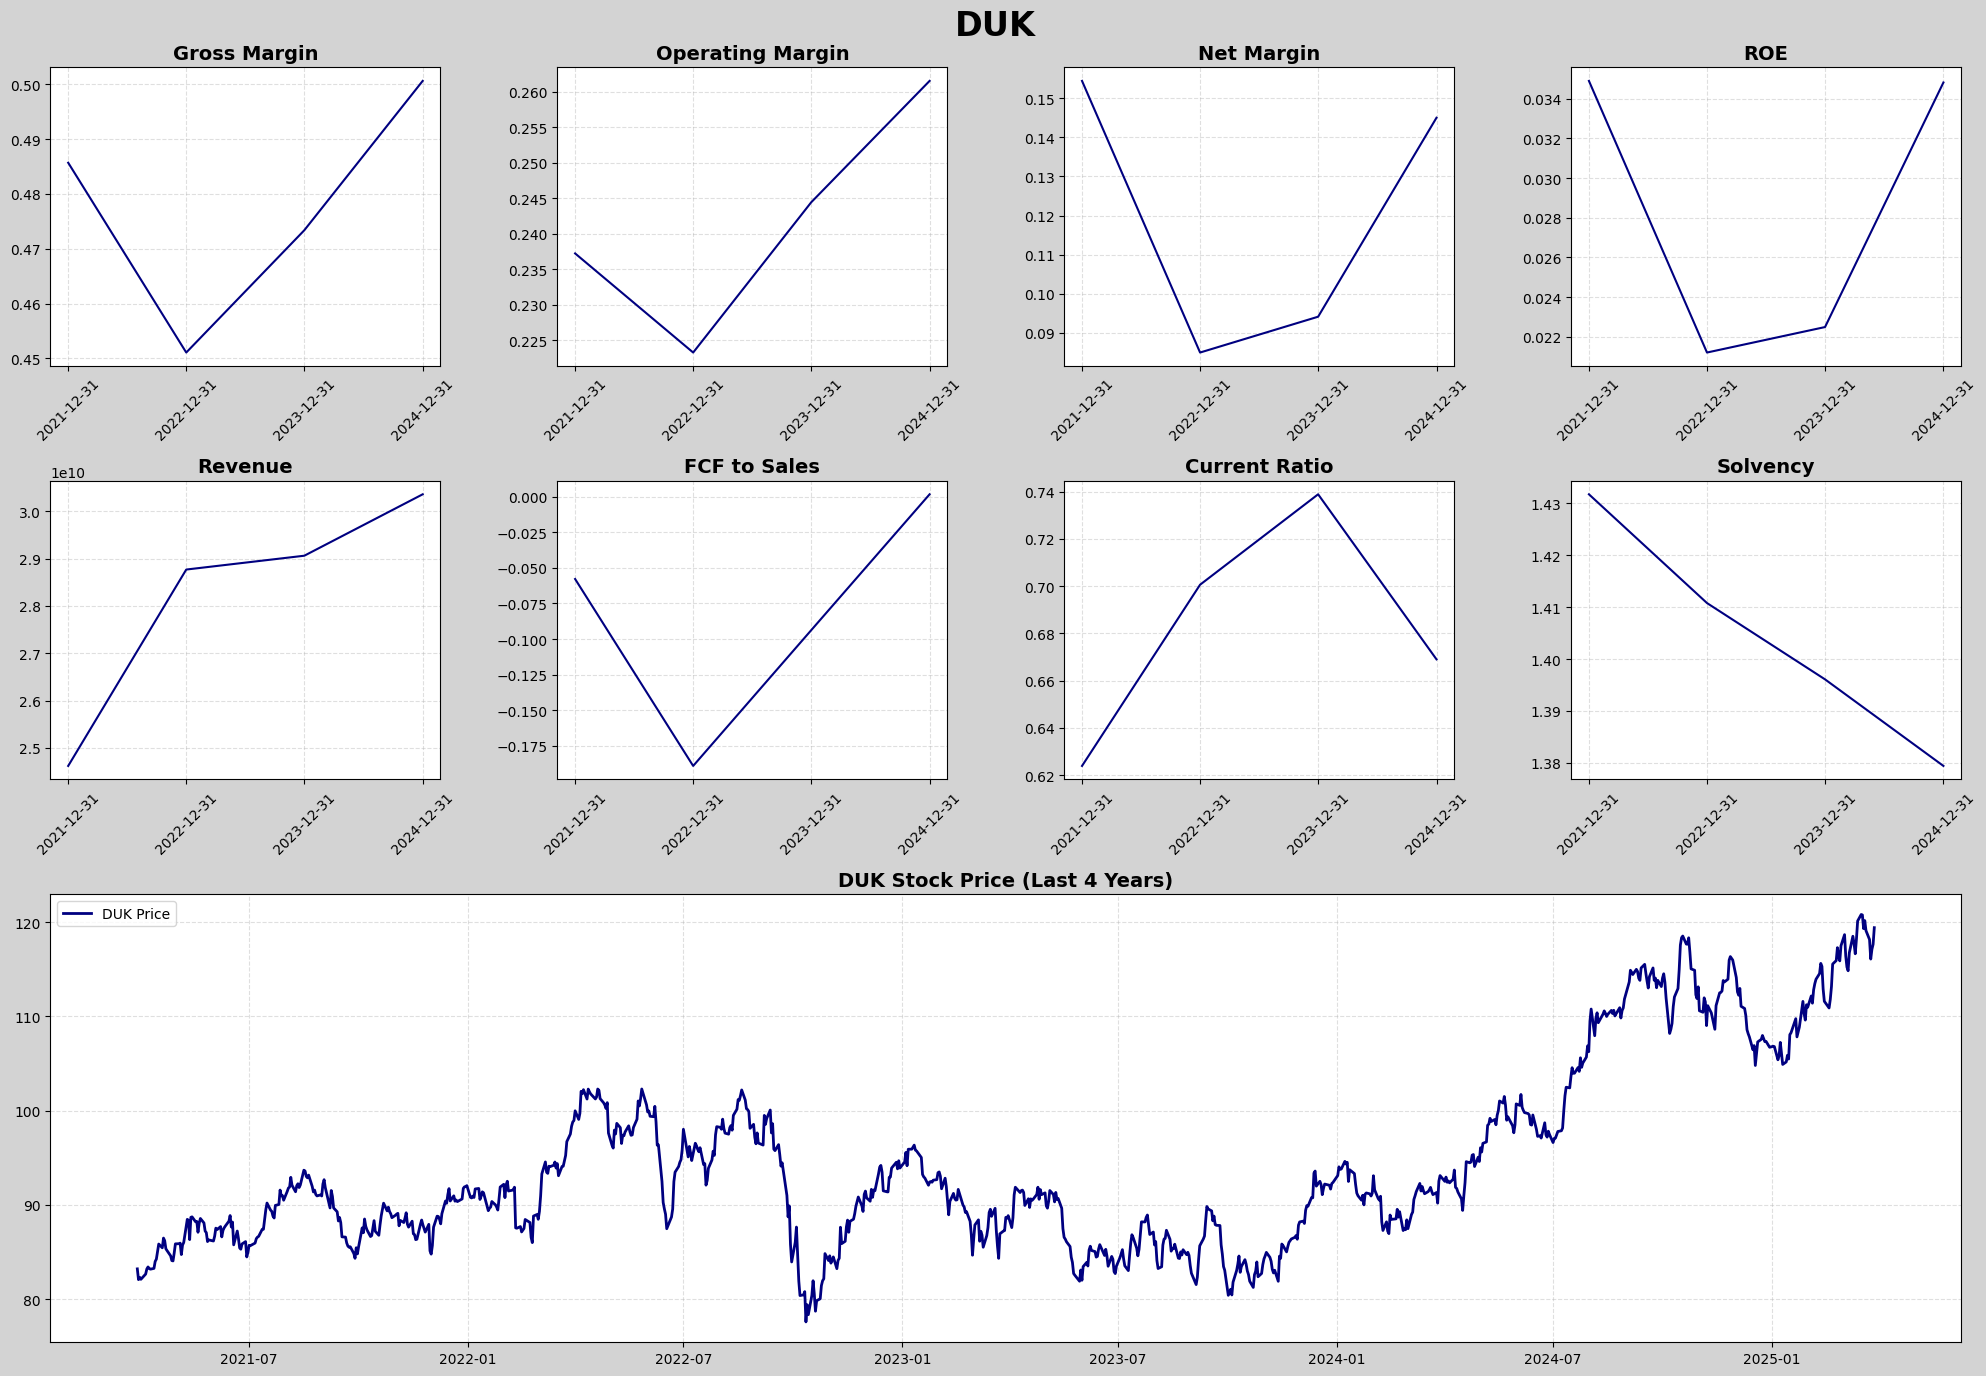

In [3]:
plot_financials('DUK')

Duke Energy tuvo un margen bruto del 31%, margen operativo del 26.1% y un margen neto del 14.8%, mientras que la media de su industria estuvo alrededor del 34%, 22.6% y 15.8% respectivamente. Lo que significa únicamente en el margen operativo se mostró fuerte ante la competencia, sin embargo, esto no es una grán preocupación, dado que, las diferencias no son tan notables. A lo largo de los años tambien han tenido aumentos controlados en sus ingresos.

En cuanto al capital restante para la reinversión (FCF), viene de recuperarse de 3 años pasados de presentar FCF negativos llegando al 0.02%, y superando a la mayoría de sus competidores, los cuales siguen contando con FCF negativos con una media de -9.5%, por lo que poco a poco, a ido ido destacando ante la competencia.

La liquidez en el corto plazo no es un grán problema, dado que que se encuentra justo en la mediana de sus competidores, con un current ratio de 0.67, sin embargo, la media es de 0.78. En la liquidez a largo plazo, cuenta con un solvency de aproximadamente 1.38. Por lo tanto, la liquidez de Duke es uno de sus principales problemas, dado que hemos visto que no tienen mucho capital sobrante para su reinversión y tampoco muestran los mejores niveles de liquidez en el corto y largo plazo.

La empresa cuenta con un P/E de 21.01, el cual, es superior a la media de sus competidores de 20.6. Además su P/BV de 1.89 es muy bajo comparado a la media de su industria con 2.45. Por último su EPS se posiciona como el segundo mas alto de la industria con un 5.68. Esto significa que Duke ha dado grandes rentabilidades en comparación a sus competidores y además la el precio de su acción está muy por debajo del valor en libros a comparación de sus competidores, lo que significa, que aunque muestra mejores números que la competencia, los inversionistas no han logrado valorar correctamente a Duke Energy.

### <font color = "dodgerblue"> Expectativas y planes a futuro

Duke Energy tiene planes muy concretos a futuro y tienen que ver con reducir las emisiones de carbono, dado que para 2030 esperan haber reducido un 50% de las hemisiones y para 2050 haberlas eliminado en su totalidad. Además han dicho que cancelarán sus inversiones en el corto plazo hacia la energía nuclear. Para lograr estos objetivos planean realizar una inversión de 150 mil millones de dólares en los próximos 10 años distribuidos de la siguiente manera:

+ El 85% se destinaría a la modernización de la red eléctrica, y a la energía de cero emisiones de carbono, como páneles solares, energría eólica y baterías para almacenar la energía. Además planerarían remodalar y manentener activa sus plantas nucleares.

+ El restante se invertiría en tecnologías de gas natural basadas en hidrógeno.

+ Las fechas de estas inversiones siguen sin definirse en su totalidad dado que están en espera de que sean aprovadas por las regulaciones.



## <font color = "dodgerblue"> Coyuntura Económica

Dado que es esperado que la volatilidad en EE.UU. incremente este año, es buena idea incluir una compañía de seguridad en el portafolio, dado que es una de las más importantes en el ramo de la energía en el país. Por otro lado, si las tasas de interés bajaran, como es esperado, Duke al ser una compañía con mucha modernización e inversión se vería beneficiada con costos de financiamiento menores. 

Con motivo a la imposición de recientes aranceles del presidente Donald Trump, podría haber problemas con la importación de páneles solares y baterías para el almacenamiento de la energía, además de que es probable que Trump no tenga prioridades en invertir en energías limpias y renovables que ayuden con el cambio climático.

## <font color = "royalblue"> Taiwan Semiconductor Manufacturing (TSM)

### <font color = "dodgerblue"> Descripción de la empresa 

Taiwan Semiconductor Manufacturing es la empresa más grande y avanzada en cuantro a la producción de semiconductores en el mundo. Fue fundada en 1987 y su metodología de trabajo no se basa en desarrollar sus propios semiconductores, sino que se centran unicamente en producir los diseños que realizan otras compañías. Han trabajado para más de 500 clientes y manufacturado casí 12 mil productos diferentes con operaciones en Arizona, EE.UU. pero tambien en Taiwan y China.

Se especializan principalmente en los siguientes ramos:

+ Producen chips y procesadores para smartphones y computadoras (incluyendo iPhones de Apple y demás productos).

+ Son el principal productor para los centros de datos y supercomputadoras especializados en la inteligencia artificial, con clientes del calibre de Nvidia y AMD.

+ En el mercado automotriz producen chips encargados de la asistencia al manejo, así como tambien, los equipos de infoentretenimiento que tienen los carros.

No obstante, TSM posee el 73% del market cap en la industria de productora de semiconductores, lo que la vuelve líder. Además, dado el modelo de negocio que tienen, únicamente se arriesgan a fallos en su producción, por lo que si estos componentes tienen fallos de diseño no serían atribuibles a TSM, posicionando a la empresa dentro del "Boom" tecnológico y de la inteligencia artificial sin exponerse a tantos riesgos como si los tienen otras empresas como Nvidia.

### <font color = "dodgerblue"> Fundamentales

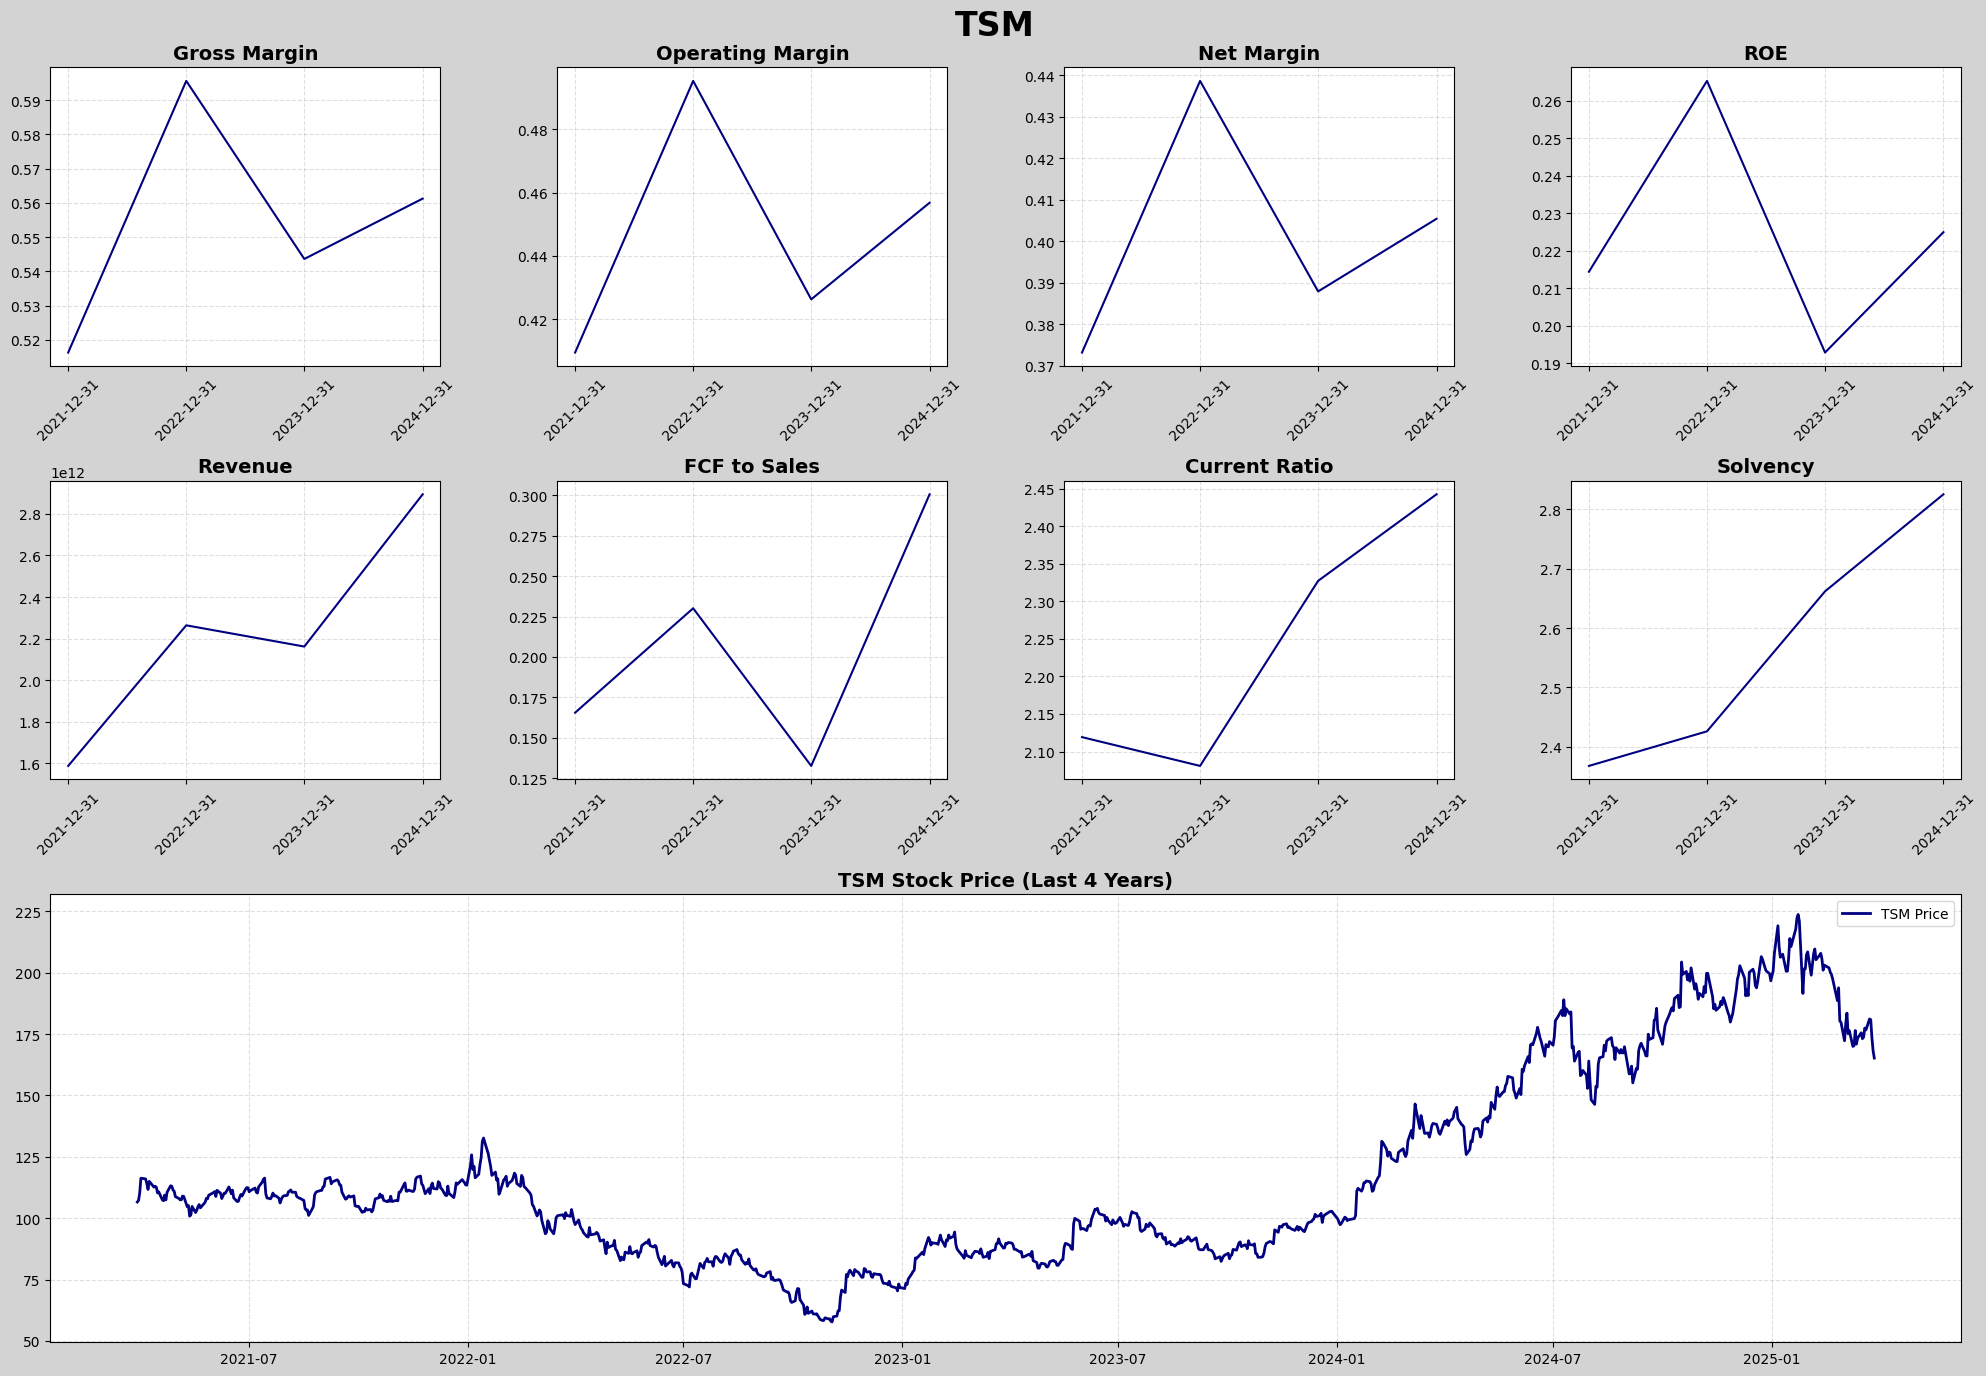

In [4]:
plot_financials('TSM')

El margen bruto fue de 54.7%, el operativo de 45% y el neto de un 40% posicionándose casi dos veces por encima del promedio de sus competidores, el cual está en 35%, 25.9% y 22.2% respectivamente. Estos números confirman la fuerza que tiene TSM en la industria en la que compite teniendo unos márgenes altísimos en comparación a sus competidores y crecimientos en sus ingresos.

En los últimos años se ha observado un crecimiento considerable en el FCF de la empresa, lo que muestra la grán capacidad que tienen para realizar nuevas inversiones. Además TSM tiene unos buenos niveles de liquidéz, en el corto plazo con un current ratio de 2.44, mientras que la media de sus competidores está en 2.4. En el largo plazo, cuentan con un solvency de poco más de 2.8, lo que indica, que la liquidez no presenta ningún problema a la empresa.

TSM cuenta con un EPS de 7.04, el cual es aproximadamente 7 veces mayor al de sus competidores, dado que la mayoría ni siquiera sobrepasan el EPS de 1. Su P/BV se encuentra en 6.50 y su P/E en 23.46, mientras que el promedio de la industria está en 4.78 y 22.06 respectivamente, lo que significa que TSM podría estár ligeramente sobrevaluada, pero esto no representa un grave problema dado el dominio y solidez que tienen, y recordando que prácticamente participan en un mercado el cual son dueños por un 73%, por lo que, podemos decir que esta valuada razonablemente. 

### <font color = "dodgerblue"> Expectativas y planes a futuro

TSM tiene planes a futuro muy ambiciosos. Anunciaron que planean realizar inversiones en Arizon que llegarían hasta 165 mil millopnes de dólares, con motivo de abrir tres nuevas plantas de fabricación, dos nuevas instalaciones de empaquetado, un desarrollo e investigación. Planean refinar sus tecnologías de chips 4nm (nanómetros), 3nm, 2nm y CoWoS, que consiste en una tecnología de apilamiento de chips para procedimientos demandantes como la inteligencia artificial. 

Por otro lado, tambien planean invertir en la investigación de nuevos materiales, así como tambien, en una expansión a Europa y Japón, por lo que tendrían producciónes geográficamente más estables. En cuanto al medio ambiente, estan comprometidos con las prácticas de fabricación ecológicas, ahorro de agua, programas de energía renovable y el alcanzar las cero emisiones de carbono.

### <font color = "dodgerblue"> Coyuntura Económica

Ambos BlackRock y JP Morgan sugieren que la industría de inteligencia artificial será de los personajes principales en estos años, por lo que, TCM al ser el líder mundial en la producción de chips, se posiciona como una de las compañías principales para la inversión en empresas tecnológicas. Por otro lado, aunque no es muy grande, tienen diversificación en sus ramas de producción, no solo fabrican chips y semiconductores, sino que están en la producción de autopartes tecnológicas y en la conectividad del internet de las cosas y redes 5G.

A pesar de que en estos tiempos TSM puede sufrir de riesgos por sus operaciones en China y Taiwan, hay que recordar que está planeando una diversificación geográfica en Europa, Japón e inversiones muy grandes en Estados Unidos, lo que puede darles solidez ante estos riesgos. Incluso, debido a sus establecimientos en estos países asíaticos, TSM podría considerarse como una empresa en mercados emergentes, sin embargo, sus fuertes margenes y monopolización del mercado demuestran lo contrario de un activo de mercados emergentes.

## <font color = "royalblue"> EMCOR Group (EME)

### <font color = "dodgerblue"> Descripción de la empresa 

EMCOR Group fundado en 1987 con sede en Norwalk, Connecticut en EE.UU. Cuentan con aproximadamente 40 mil empleados y sus principales segmentos de negocio son: 

+ **EMCOR ECS:** servicios de construcción de centrales eléctricas, centros de datos, sistemas de tráfico.
+ **EMCOR EBS:** mantenimiento de instalaciones, plomería, seguridad contra incendios, mejoras en eficiencia energética.
+ **EMCOR EIS:** Mantenimiento de de refinerías petroleras, infraestructura de energía renovable y captura de carbono.

EMCOR es líder en proyectos de infraestructura de EE.UU. beneficiándose de proyectos del gobierno de hasta 1 billón de dólares, para seguridad nacional, clientes comerciales, educación, servicios de salud e incluso para la NASA. 

### <font color = "dodgerblue"> Fundamentales

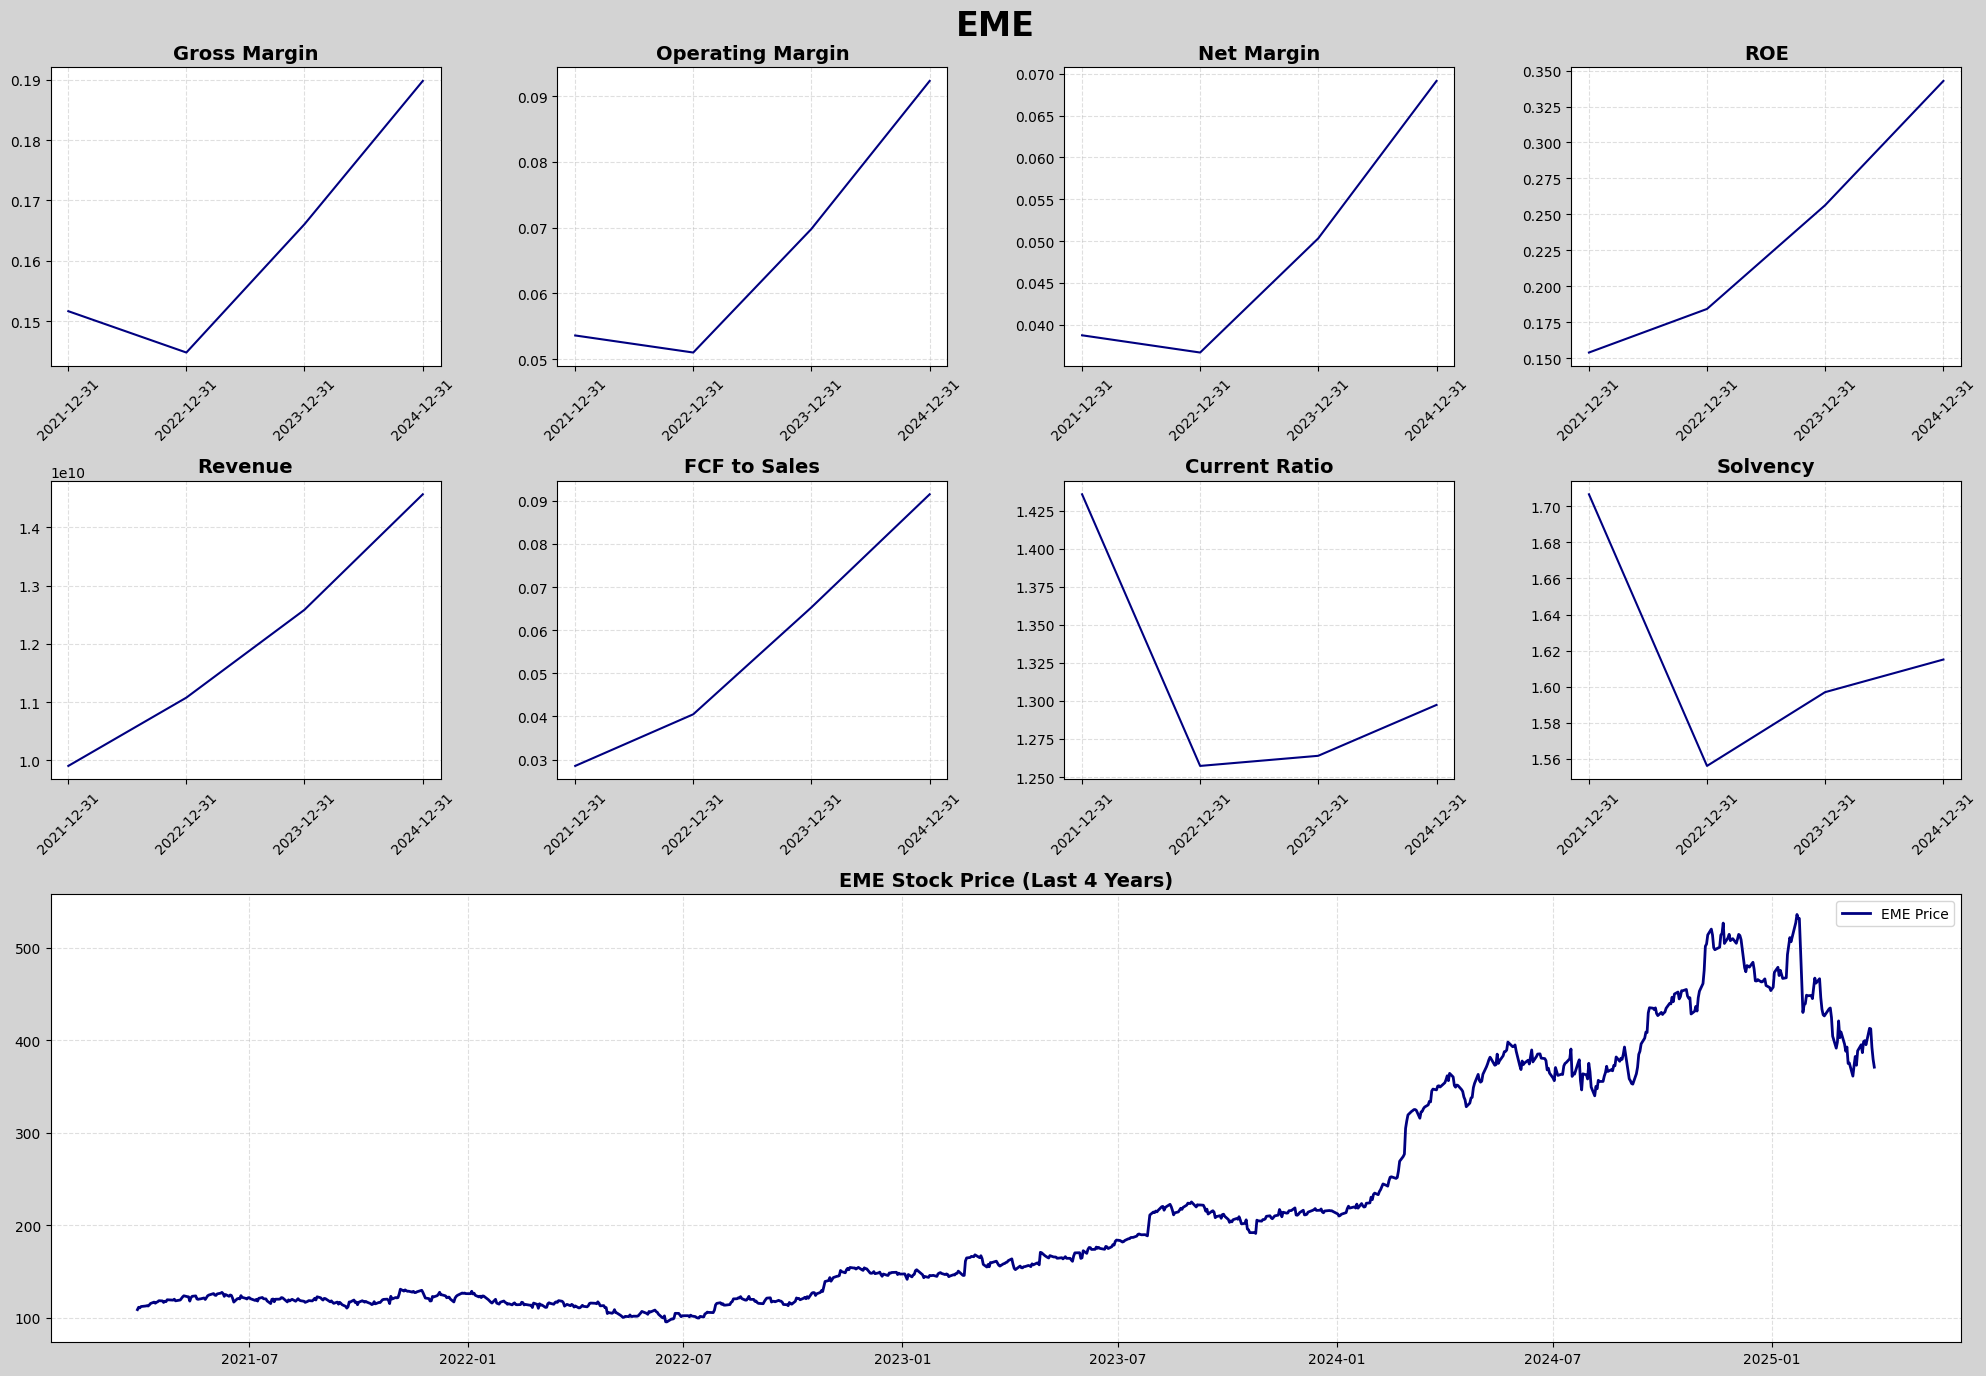

In [5]:
plot_financials('EME')

EME obtuvo un margen bruto de 19%, margen operativo de 9.2% y margen neto de 6.9% superando la mediana de sus competidores y estándo un poco por debajo en la media del margen bruto de sus competidores pero superando las de los otros márgenes siendo de 25.3%, 5.5% y 4.9% respectivamente. Además han tendio un crecimiento en sus ingresos los últimos años viéndose como buenos competidores en la industria.

Sus FCF han crecido recientemente obteniendo un 9.2% a comparación de sus la media de sus competidores en 6.1%, lo que indica mayor capacidad de reinvertir capital contra su industria. En cuanto a su liquidez en el corto plazo, tienen un current ratio de 1.30 superando a la media de sus competidores de 1.27, lo cual es bueno. En cuanto al largo plazo, tienen un solvency de aproximadamente 1.6, lo que indica que EME no tiene mucho por lo que preocuparse en su liquidez.

El EPS de EME es de 21.52 superando por mucho a todos sus competidores, lo que indica buena rentabilidad para los inversionistas. Su P/BV de 5.78 está ligeramente por encima de la media de sus competidores de  3.74, sin embargo podría justificarse por los altos rendimientos que presenta en el EPS. Además, su P/E de 17.24 está notablemente por debajo de la media de 26.87 de la industria, lo que quizá podría interpretarse como que EME está ligeramente infravalorada, hacíendola una opción atractiva de inversión.

### <font color = "dodgerblue"> Expectativas y planes a futuro

Gracias al la alta demanda de infraestructura para la computación e inteligencia artificial, EME planea entrar en este mercado expandiéndose aún más en la construcción de centros de datos. Así mismo, planean continuar aprovechándose de proyectos del gobierno estadounidense como nuevas carreteras, redes 5G, energías renovables, conservación del agua y reforzar su expansión en el Reino Unido. Además, este 2025 anunciaron que expandirían su portafolio cerrando un M&A adquiriendo Miller Electric para expandir sus capacidades y alcane geográfico.

### <font color = "dodgerblue"> Coyuntura Económica

Nuevamente, gracias al la fuerza en el mercado que se espera por parte de la inteligencia artificial, EME tiene altas oportunidades de hacerse de grandes proyectos de construcción e infraestructura para centros de datos en los Estados Unidos. Además gracias a sus fuertes alianzas con el gobierno estadounidense, podrían no preocuparse tanto ante tiempos volátiles, sin embargo, tienen que preocuparse por no perder esas alianzas.

Por otro lado, EME tiene poca exposición en otros mercados en el mundo, lo que podría ser complicado adaptarse ante riesgos políticos en EE.UU. Por último, retomando que se esperan tiempos volátiles, podrán estar cubiertos con su amplia segmentación de negocios, impulsándose en las redes eléctricas, e infraestructura para IA y centros de datos.

## <font color = "royalblue"> Linde Plc (LIN)

### <font color = "dodgerblue"> Descripción de la empresa 

Linde Plc, fundada en 2018 mediante la fusión de Linde AG y Praxair, es una empresa líder mundial enfocada en gases industriales e ingeniería especialemtne en la producción, distribución y aplicación. Trabajan gases como el oxígeno, argón, hidrógeno, nitrógeno y dióxido de carbono. Dan servicios a plantas de gas, de separación de aire, entre otros. Esta empresa opera en más de 100 países y actualmente cuentan con aproximadamente 65 mil trabajadores. Sus segmentos de negocio se dividen en de la siguiente manera:

+ **América:** Producción y distribución en EE.UU., Canadá, México y Brasil.
+ **Europa, Medio Oriente y África:** Tienen instalaciones en Alemania, Reino Unido, España, Italia y Rusia. 
+ **Asia:** Operaciones en China, India, Korea y Tailandia.
+ **Ingeniería:** Son proveedores de tecnología y construyen plantas para el procesamiento de Gas.

Las principales industrias en las que participan son en la médica, alimentos, manufactura, electrónicos, energía, químicos y sustentabilidad, por lo que, podemos decir que LIN tiene impacto en mercados desarrollados así como tambien alta exposición a los mercados emergentes, haciendo que estén muy diversificados geográficamente, además de que participan en las industrias mas importantes en estos momentos.

### <font color = "dodgerblue"> Fundamentales

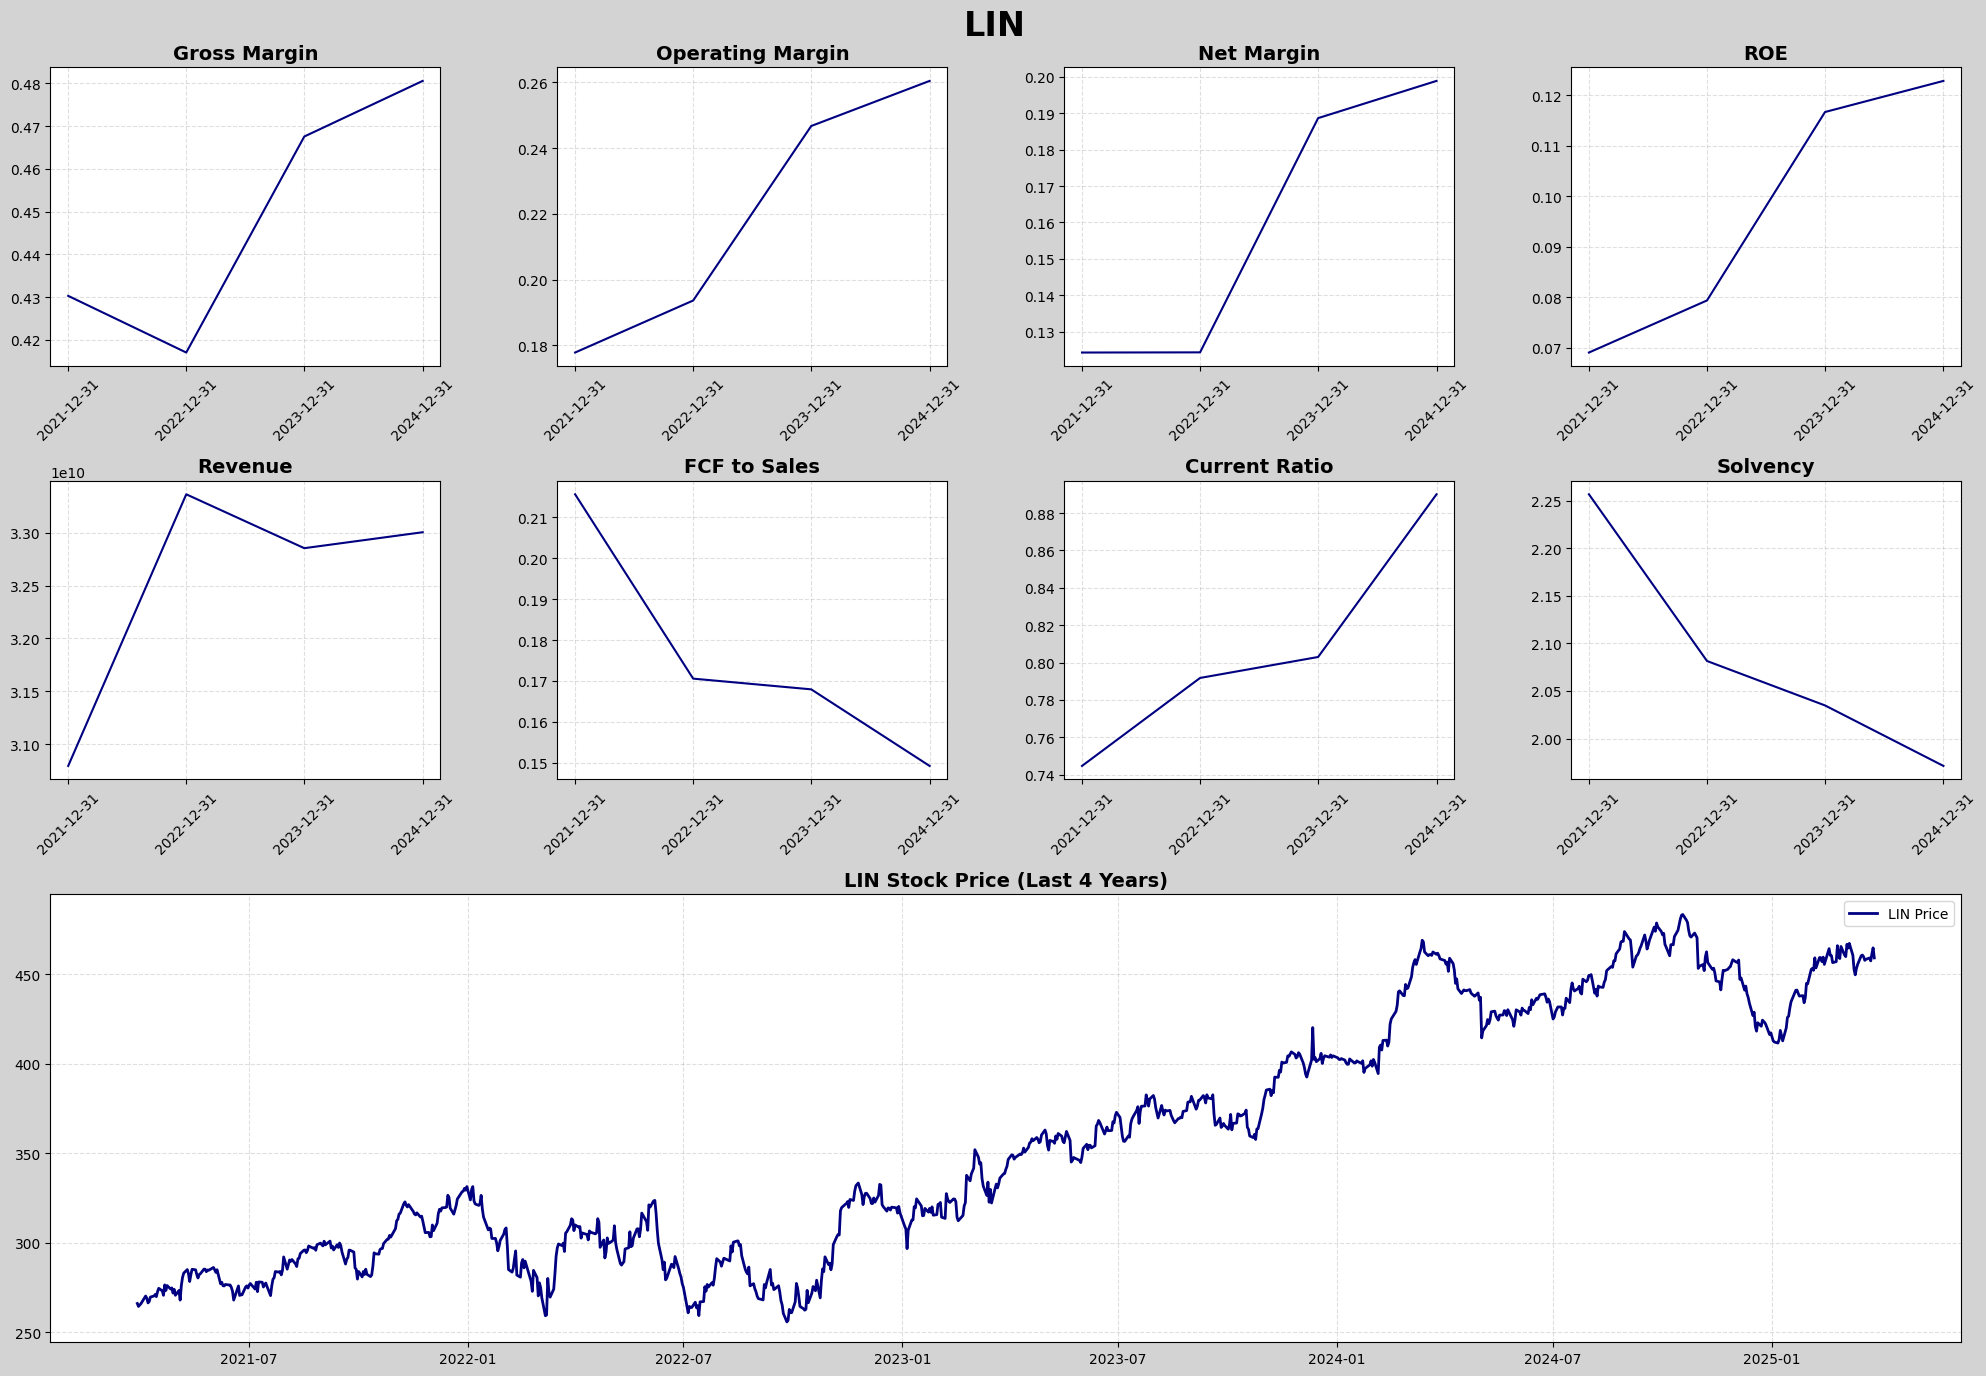

In [7]:
plot_financials('LIN')

LIN obtuvo de los márgenes más altos a comparación de sus competidores. De margen bruto un 36.6%, operativo de 26% y neto de 19.9%. Mientras que la mediana de sus competidores fue de 30.2%, 11.7% y 6.2% respectivamente. Esto demuestra el liderazgo que tiene LIN ante sus competidores, así como tambien solidez con en el crecimiento en sus ingresos que han tenido en los últimos años.

Sus FCF en los últimos años han visto caidas llegando a un 15%, sin embargo, a pesar de sus caidas tienen el mayor FCF contra sus competidore, los cuales tienen un promedio de -0.5%, por lo que LIN, tambien lidera ampliamente la capacidad de reinversión.

En cuanto a su capacidad liquidez en el corto plazo han mostrado un crecimiento importante llegando a un current ratio de 0.89, sin embargo, en esta parte se encuentra por debajo de la media de su industria, la cual es de 1.39. Hablando de la liquidez a largo plazo han mostrado tambien una pequeña caída en los últimos años, sin embargo se posicionan con un solvency de aproximadamente 1.97, por lo que sigue siendo muy buena y no habría mucho de que preocuparse en este aspecto.

Tienen un EPS de 13.62 posicionándose en el segundo lugar de sus principales competidores, donde algunos, incluso presentaron EPS negativos. Por otro lado su P/BV de 5.70 tambien se encuentra un poco alto, superando a la media de sus competidores de 3.78, sin embargo, esta diferencia no es tan notable, dado que puede estar justificada por su muy alto EPS y además, su alto P/E de 33.71, el cual, tambien supera a la media de la industra de 26.47. 

### <font color = "dodgerblue"> Expectativas y planes a futuro

LIN planea realizar inversones fuertes en planes con respecto a tecnologías de hidrógeno. Primero que nada, planean invertir 2 mil millones de dólares en una planta de hidrógeno limpio para el proyecto "Path2Zero" de Dow, con los cuales, están muy interesados en asegurar acuerdos largo plazo que los ayude a incrementar sus ingresos. Además, darían servicios con sus tecnologías de hidrógeno para nuevos centros de datos impulsados por el boom tecnológico e IA, así como tambien para las redes eléctricas. 

Como fue mencionado anteriormente, tienen proyectos importantes en cuanto a la sustentabilidad, dado que planean invertor mil millones de dólares en iniciativas de la descarbonización, logrando alcanzar una reducción de emisiones de gas del 35% para 2035. Por otro lado, planean desarrollar nuevas tecnologías de aplicación para el hidrógeno crenado gases autotérmicos que servirían para la fabricación de semiconducores y dispositivos del sector de la salud.

### <font color = "dodgerblue"> Coyuntura Económica

Como es mencionado en los papers, para estos años se acerca un gran crecimiento en la demanda de centros de datos impulsados por la inteligencia artificial, y por ende, un aumento tambien en la infraestructura eléctrica, por lo que LIN, al ser lider en estos campos se encuentra en una muy buena posición para aprovecharse de esto. Además, no solo lideran en infraestructura, sino que tambien se beneficiarán como proveedores de sus tecnologías de hidrógeno para la fabricación de semiconductores y chips, la cual tambien está impulsada por la inteligencia artificial.

En cuanto a los riesgos que puede haber por el nuevo cambio de presidencia en EE.UU., LIN está cubierto debido a su alta diversificación geográfica en más de 100 países, además tienen una grán exposición en los mercados emergentes, lo que, le estaría dando alta protección ante la inflación. Pueden beneficiarse mucho no solo en los EE.UU. y sus proyectos en Canadá, sino participando en empresas del calibre como TSM siendo sus proveedores de gases para la fabricación de sus chips y semiconductores impulsados por la IA. 

## <font color = "dodgerblue"> 